**Library Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
import re
from wordcloud import WordCloud

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Conv1D,MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

Exploring Fake News

In [ ]:
df_fake = pd.read_csv("fake1.csv")

In [ ]:
df_fake.sample(5)

,title,text,subject,date
19,"UNESCO declares new Rs 2,000 note best currenc...",Another fake UNESCO certificate for India touc...,news,28-11-2018
22,The current PM is the first PM in India's hist...,Before that let me tell you a bit about the In...,news,30-11-2018
10,The india Eye' - The fake news factory promote...,In the aftermath of the oppotsition's Mahagath...,news,02-02-2018
37,"Maharashtra actor, student arrested over posts...",A Marathi actor and a pharmaceutical student i...,news,30-11-2018
25,Maharashtra CM Uddhav Thackeray says BJP indul...,Thackeray said the BJP had given loudspeakers ...,news,30-11-2018


In [ ]:
df_fake.head()

,title,text,subject,date
0,Did RSS chief Mohan Bhagwat say PM Modi works ...,A screenshot on social media claiming that RSS...,news,13-11-2018
1,Misinformation Is Endangering India’s Election,"For instance, after February’s Kashmir attack,...",news,03-07-2018
2,Protesters in Lucknow chanted ‘Pakistan Zindabad’,"On December 28, Malviya tweeted a video of pro...",news,18-07-2018
3,Attempts to portray Nehru as immoral,"In November 2017, the BJP leader shared a coll...",news,14-05-2018
4,Clipped video of Manmohan Singh,"On November 27, 2018, Malviya tweeted a video ...",news,30-04-2018


In [ ]:
df_fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
text = ' '.join(df_fake['text'].tolist())

In [ ]:
import nltk

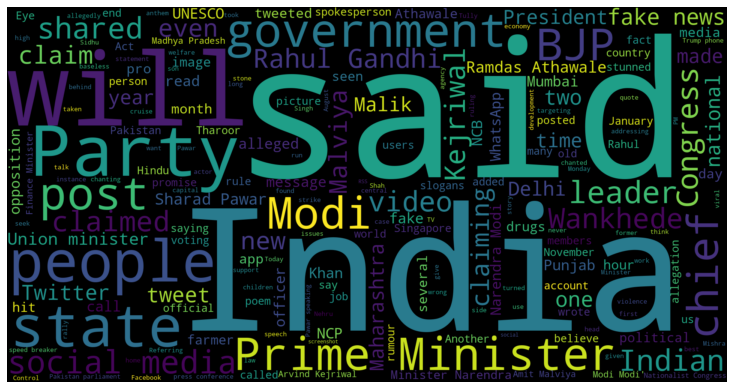

In [ ]:
wordcloud = WordCloud(width=1920,height=1000).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Exploring Real News

In [ ]:
df_true = pd.read_csv("true_news.csv")

In [ ]:
text = ' '.join(df_true['text'].tolist())

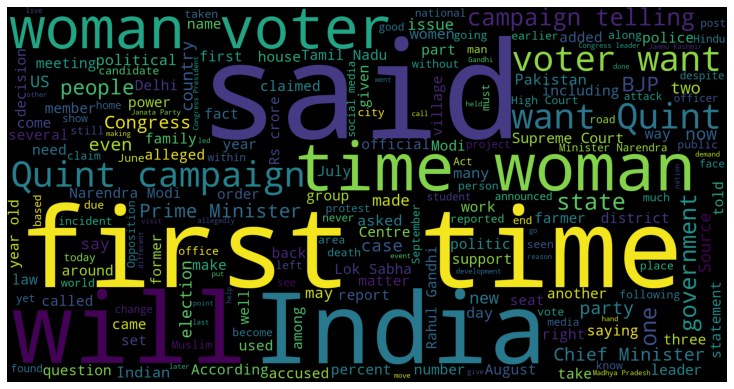

In [ ]:
wordcloud = WordCloud(width=1920,height=1000).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Cleaning

In [ ]:
df_true.sample(5)

,title,text,subject,date
783,Section 377 SC Verdict: But What About Women? ...,Zed* and I clinked our beer mugs in celebratio...,news,7/9/2018
107,In Video: The Mizoram Assembly Elections Expla...,Mohd Irshad Alam Voting for Mizoram’s 40-membe...,news,23-11-2018
416,Narendra Modi is a Paradoxical Prime Minister:...,In one of his sharpest attacks yet on Narendra...,news,27-10-2018
468,Blog | Why India’s Corporates & Corporate Honc...,She is ten years old. The men of the family ar...,news,22-10-2018
1083,Pakistan Government: With Army’s Eyes on Prime...,Pakistan Prime Minister Imran Khan’s first add...,news,20-08-2018


In [ ]:
unknown_publishers = []
for index , row in enumerate(df_true.text.values) :
  try : 
    record = row.split(' - ' , maxsplit=1)
    record[1]

    assert(len(record[0])<260)
  except :
    unknown_publishers.append(index)

In [ ]:
len(unknown_publishers)

1995

In [ ]:
df_true.iloc[unknown_publishers]

,title,text,subject,date
0,Tulsi Gabbard: Hindu War Veteran US Lawmaker M...,"Tulsi Gabbard, the first Hindu lawmaker from H...",news,13-11-2018
1,Swami Vivekanandas 156th Birth Anniversary 201...,Swami Vivekananda ranks among the highest in t...,news,3/7/2018
2,Rift Between CBI Chief & Special Director: Thi...,"In the news for the wrong reasons, the Central...",news,18-07-2018
3,The Late Filmmaker Mrinal Sen’s ‘Cinema of Res...,Reminiscing about the past is a dreadful tool ...,news,14-05-2018
4,Tandoor Murder: Former Delhi Police Joint Comm...,: Akanksha Kumar : Sandeep Suman Twenty-three ...,news,30-04-2018
...,...,...,...,...
1995,"British Rule in India: Courtesy Thomas Roe, th...",It was December 1599 and the reign of Queen El...,news,18-06-2018
1996,We Always Said a Muscular Policy Won’t Work in...,Former Jammu and Kashmir chief minister Mehboo...,news,19-06-2018
1997,BJP PDP Alliance Ends in Jammu and Kashmir:Why...,"No phone call, no text, not even an e-mail. Th...",news,19-06-2018
1998,BJP-PDP Alliance Ends in Jammu and Kashmir: BJ...,The collapse of the PDP-BJP government in Jamm...,news,19-06-2018


In [ ]:
df_true.iloc[20]

title      CM Naidu Gave Losing Ticket to NTR’s Granddaug...
text       Telangana caretaker IT Minister KT Rama Rao on...
subject                                                news 
date                                              30-11-2018
Name: 20, dtype: object

In [ ]:
publisher = []
tmp_text = []

for index , row in enumerate(df_true.text.values):
  if index in unknown_publishers: 
    tmp_text.append(row)
    publisher.append('Unknown')
  
  else :
    record = row.split(' - ' , maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())


In [ ]:
df_true['publisher'] = publisher
df_true['text'] = tmp_text

In [ ]:
df_true.head()

,title,text,subject,date,publisher
0,Tulsi Gabbard: Hindu War Veteran US Lawmaker M...,"Tulsi Gabbard, the first Hindu lawmaker from H...",news,13-11-2018,Unknown
1,Swami Vivekananda’s 156th Birth Anniversary 20...,Swami Vivekananda ranks among the highest in t...,news,03-07-2018,Unknown
2,Rift Between CBI Chief & Special Director: Thi...,"In the news for the wrong reasons, the Central...",news,18-07-2018,Unknown
3,The Late Filmmaker Mrinal Sen’s ‘Cinema of Res...,Reminiscing about the past is a dreadful tool ...,news,14-05-2018,Unknown
4,Tandoor Murder: Former Delhi Police Joint Comm...,: Akanksha Kumar : Sandeep Suman Twenty-three ...,news,30-04-2018,Unknown


In [ ]:
df_true.shape

(1999, 5)

In [ ]:
empty_fake_index = [index for index,text in enumerate(df_fake.text.tolist()) if str(text).strip()==""]

In [ ]:
df_fake.iloc[empty_fake_index]

,title,text,subject,date


In [ ]:
df_true['text'] = df_true['title'] + " " + df_true['text']
df_fake['text'] = df_fake['title'] + " " + df_fake['text']

In [ ]:
df_true['text'] = df_true['text'].apply(lambda x: str(x).lower())
df_fake['text'] = df_fake['text'].apply(lambda x: str(x).lower())


Preprocessing Text

In [ ]:
df_true['class'] = 1
df_fake['class'] = 0

In [ ]:
var classPredict = df_fake.columns['class']

SyntaxError: ignored

In [ ]:
df_true.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [ ]:
df_true = df_true[['text' , 'class']]

In [ ]:
df_fake = df_fake[['text' , 'class']]

In [ ]:
data = df_true.append(df_fake,ignore_index = True)

In [ ]:
data.sample(5)

,text,class
588,chandrashekhar is like ambedkar for us: ‘bachh...,1
1081,why indian constitution needs article 35a a th...,1
874,"telangana polls: trs announces 105 candidates,...",1
1230,dalai lama apologises for remark on jawaharlal...,1
1010,will satya pal malik be an effective jammu and...,1


In [ ]:
# https://github.com/laxmimerit/preprocess_kgptalkie

In [ ]:
pip install spacy==2.2.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.4 MB 4.9 MB/s 
     |████████████████████████████████| 2.2 MB 61.6 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [ ]:
pip install beautifulsoup4==4.9.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 5.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
pip install textblob==0.15.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-o4zkc6b5
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-o4zkc6b5
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=e217836cdfb5e2731ef3fd44f85a3a346079a16666719387096de0a859e7cfbe
  Stored in directory: /tmp/pip-ephem-wheel-cache-j0of4v2y/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
ps.remove_special_chars('this ,. @ $ is gre@t')

'this is gret'

In [ ]:
data.head()

,text,class
0,tulsi gabbard hindu war veteran us lawmaker ma...,1
1,swami vivekanandas 156th birth anniversary 201...,1
2,rift between cbi chief special director this i...,1
3,the late filmmaker mrinal sens cinema of resis...,1
4,tandoor murder former delhi police joint commi...,1


In [ ]:
import gensim 

In [ ]:
y = data['class'].values

In [ ]:
X = [d.split() for d in data ['text'].tolist()]

In [ ]:
type(X[0])

list

In [ ]:
print(X[0])

['tulsi', 'gabbard', 'hindu', 'war', 'veteran', 'us', 'lawmaker', 'may', 'run', 'for', 'presidency', 'tulsi', 'gabbard', 'the', 'first', 'hindu', 'lawmaker', 'from', 'hawaii', 'in', 'the', 'us', 'congress', 'is', 'considering', 'a', 'run', 'for', 'american', 'presidency', 'in', '2020', 'according', 'to', 'sources', 'close', 'to', 'her', 'on', 'friday', '9', 'november', 'at', 'a', 'medtronic', 'conference', 'in', 'los', 'angeles', 'eminent', 'indianamerican', 'dr', 'sampat', 'shivangi', 'introduced', 'gabbard', '37', 'and', 'said', 'that', 'she', 'could', 'be', 'the', 'next', 'president', 'of', 'the', 'us', 'in', '2020', 'the', 'brief', 'statement', 'was', 'marked', 'by', 'a', 'standing', 'ovation', 'in', 'the', 'presence', 'of', 'the', 'fourterm', 'congresswoman', 'from', 'the', '50th', 'us', 'state', 'gabbard', 'a', 'democrat', 'didnt', 'confirm', 'that', 'she', 'would', 'be', 'running', 'for', 'president', 'in', '2020', 'but', 'she', 'didnt', 'deny', 'it', 'either', 'tulsi', 'gabbard

In [ ]:
DIM = 100 
w2v_model = gensim.models.Word2Vec(sentences=X , size=DIM , window=10 , min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

40706

In [ ]:
w2v_model.wv['love']

array([ 0.9895916 ,  0.29986185,  0.0436726 , -0.38957304, -0.65149266,
       -0.41703436, -0.29075354, -0.41347513, -0.55255216, -0.224917  ,
        0.02411366,  0.48828414, -0.17137107, -0.21419151, -0.39047453,
       -0.43388054, -0.47791064, -0.40889758,  0.33859462, -0.16901283,
       -0.20296863,  0.0790524 ,  0.20930624, -0.72429997,  0.08907065,
        0.26962706,  0.18441775,  0.36501017, -0.20537665, -0.00766725,
        0.25981015,  0.7745269 ,  0.14636914,  0.01763976, -0.10262985,
        0.55141973, -0.8987432 , -0.20346904, -0.24214591, -0.14157288,
       -0.11024687,  0.44132748, -0.5074995 ,  0.28371608,  0.5199305 ,
        0.34885666,  0.25441343, -0.15870671,  0.08877563, -0.36327258,
        0.15482548, -0.3523444 ,  0.20522466,  0.11304671, -0.37956545,
        0.06858498,  0.5709028 , -0.31699178,  0.5615463 , -0.05408057,
        0.29219097,  0.8800334 ,  0.01971389,  0.12965982,  0.4493525 ,
       -0.12515098,  0.10304534,  0.3464583 , -0.31600407, -0.45

In [ ]:
w2v_model.wv.most_similar('politics')

[('political', 0.8872674703598022),
 ('takeaway', 0.8683754801750183),
 ('mahagathbandhan', 0.8548699617385864),
 ('ambitions', 0.8526368141174316),
 ('governed', 0.8298391103744507),
 ('ideologies', 0.8291891813278198),
 ('leadership', 0.8233927488327026),
 ('strong', 0.8190396428108215),
 ('antiincumbency', 0.8186512589454651),
 ('grassroots', 0.818291187286377)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)

In [ ]:
tokenizer.word_index

In [ ]:
plt.hist([len(x) for x in X] , bins = 700)
plt.show()

In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

157

In [ ]:
maxlen = 1000 
X = pad_sequences(X,maxlen = maxlen)

In [ ]:
len(X[101])

1000

In [ ]:
vocab_size = len(tokenizer.word_index) +1

In [ ]:
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model) : 
  weight_matrix = np.zeros((vocab_size , DIM))

  for word , i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(40707, 100)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size , output_dim= DIM , weights = [embedding_vectors] , input_length=maxlen , trainable = False ))
model.add(LSTM(units=128))
model.add(Dense (1,activation = 'sigmoid'))
model.compile(optimizer= 'adam' , loss = 'binary_crossentropy' , metrics = ['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         4070700   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 4,188,077
Trainable params: 117,377
Non-trainable params: 4,070,700
_________________________________________________________________


In [ ]:
X_train, X_test , y_train , y_test = train_test_split(X,y)

In [ ]:
model.fit(X_train, y_train, batch_size=64,  validation_split=0.3, epochs=6)

Epoch 1/6
17/17 [==============================] - 8s 90ms/step - loss: 0.0479 - acc: 0.9851 - val_loss: 0.0137 - val_acc: 0.9913
Epoch 2/6
17/17 [==============================] - 1s 58ms/step - loss: 0.0087 - acc: 0.9981 - val_loss: 0.0121 - val_acc: 0.9956
Epoch 3/6
17/17 [==============================] - 1s 59ms/step - loss: 0.0046 - acc: 0.9991 - val_loss: 0.0092 - val_acc: 0.9978
Epoch 4/6
17/17 [==============================] - 1s 58ms/step - loss: 0.0036 - acc: 0.9991 - val_loss: 0.0111 - val_acc: 0.9978
Epoch 5/6
17/17 [==============================] - 1s 60ms/step - loss: 0.0031 - acc: 0.9991 - val_loss: 0.0110 - val_acc: 0.9978
Epoch 6/6
17/17 [==============================] - 1s 58ms/step - loss: 0.0030 - acc: 0.9991 - val_loss: 0.0113 - val_acc: 0.9978


In [ ]:
y_pred = (model.predict(X_test) >=0.5).astype(int) 

In [ ]:
accuracy_score(y_test , y_pred)

1.0

In [ ]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00       500

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510

